**Линейный Дискриминантный Анализ (Linear Discriminant Analysis, LDA):**

LDA - это метод машинного обучения, который используется для классификации и извлечения признаков. Он часто применяется в области распознавания образов и анализе данных. Вот несколько ключевых аспектов этого метода:

**Алгоритм:**
1. **Расчет средних значений:** Для каждого класса вычисляются средние значения признаков.
2. **Расчет внутриклассовой матрицы рассеяния:** Определяется, насколько данные внутри каждого класса разбросаны.
3. **Расчет межклассовой матрицы рассеяния:** Определяется, насколько средние значения разных классов отличаются друг от друга.
4. **Решение обобщенной задачи на собственные значения:** Решается обобщенная задача на собственные значения, чтобы найти оптимальные направления проекции данных.

**Плюсы:**
- **Улучшение классификации:** LDA стремится максимизировать расстояние между классами и минимизировать разброс внутри классов, что делает его эффективным для задач классификации.
- **Извлечение признаков:** LDA может использоваться для сокращения размерности данных, сохраняя при этом важные различия между классами.

**Минусы:**
- **Чувствительность к выборосам:** LDA может быть чувствителен к выбросам в данных, что может повлиять на его производительность.
- **Требования к нормальности распределения данных:** LDA предполагает нормальное распределение данных в каждом классе.

**Применение:**
- **Распознавание лиц:** LDA широко применяется в распознавании лиц для извлечения и классификации признаков.
- **Медицинская диагностика:** В области медицинской диагностики LDA может использоваться для классификации пациентов на основе различных биометрических данных.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv("Datasets/winequality-red.csv")
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [3]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

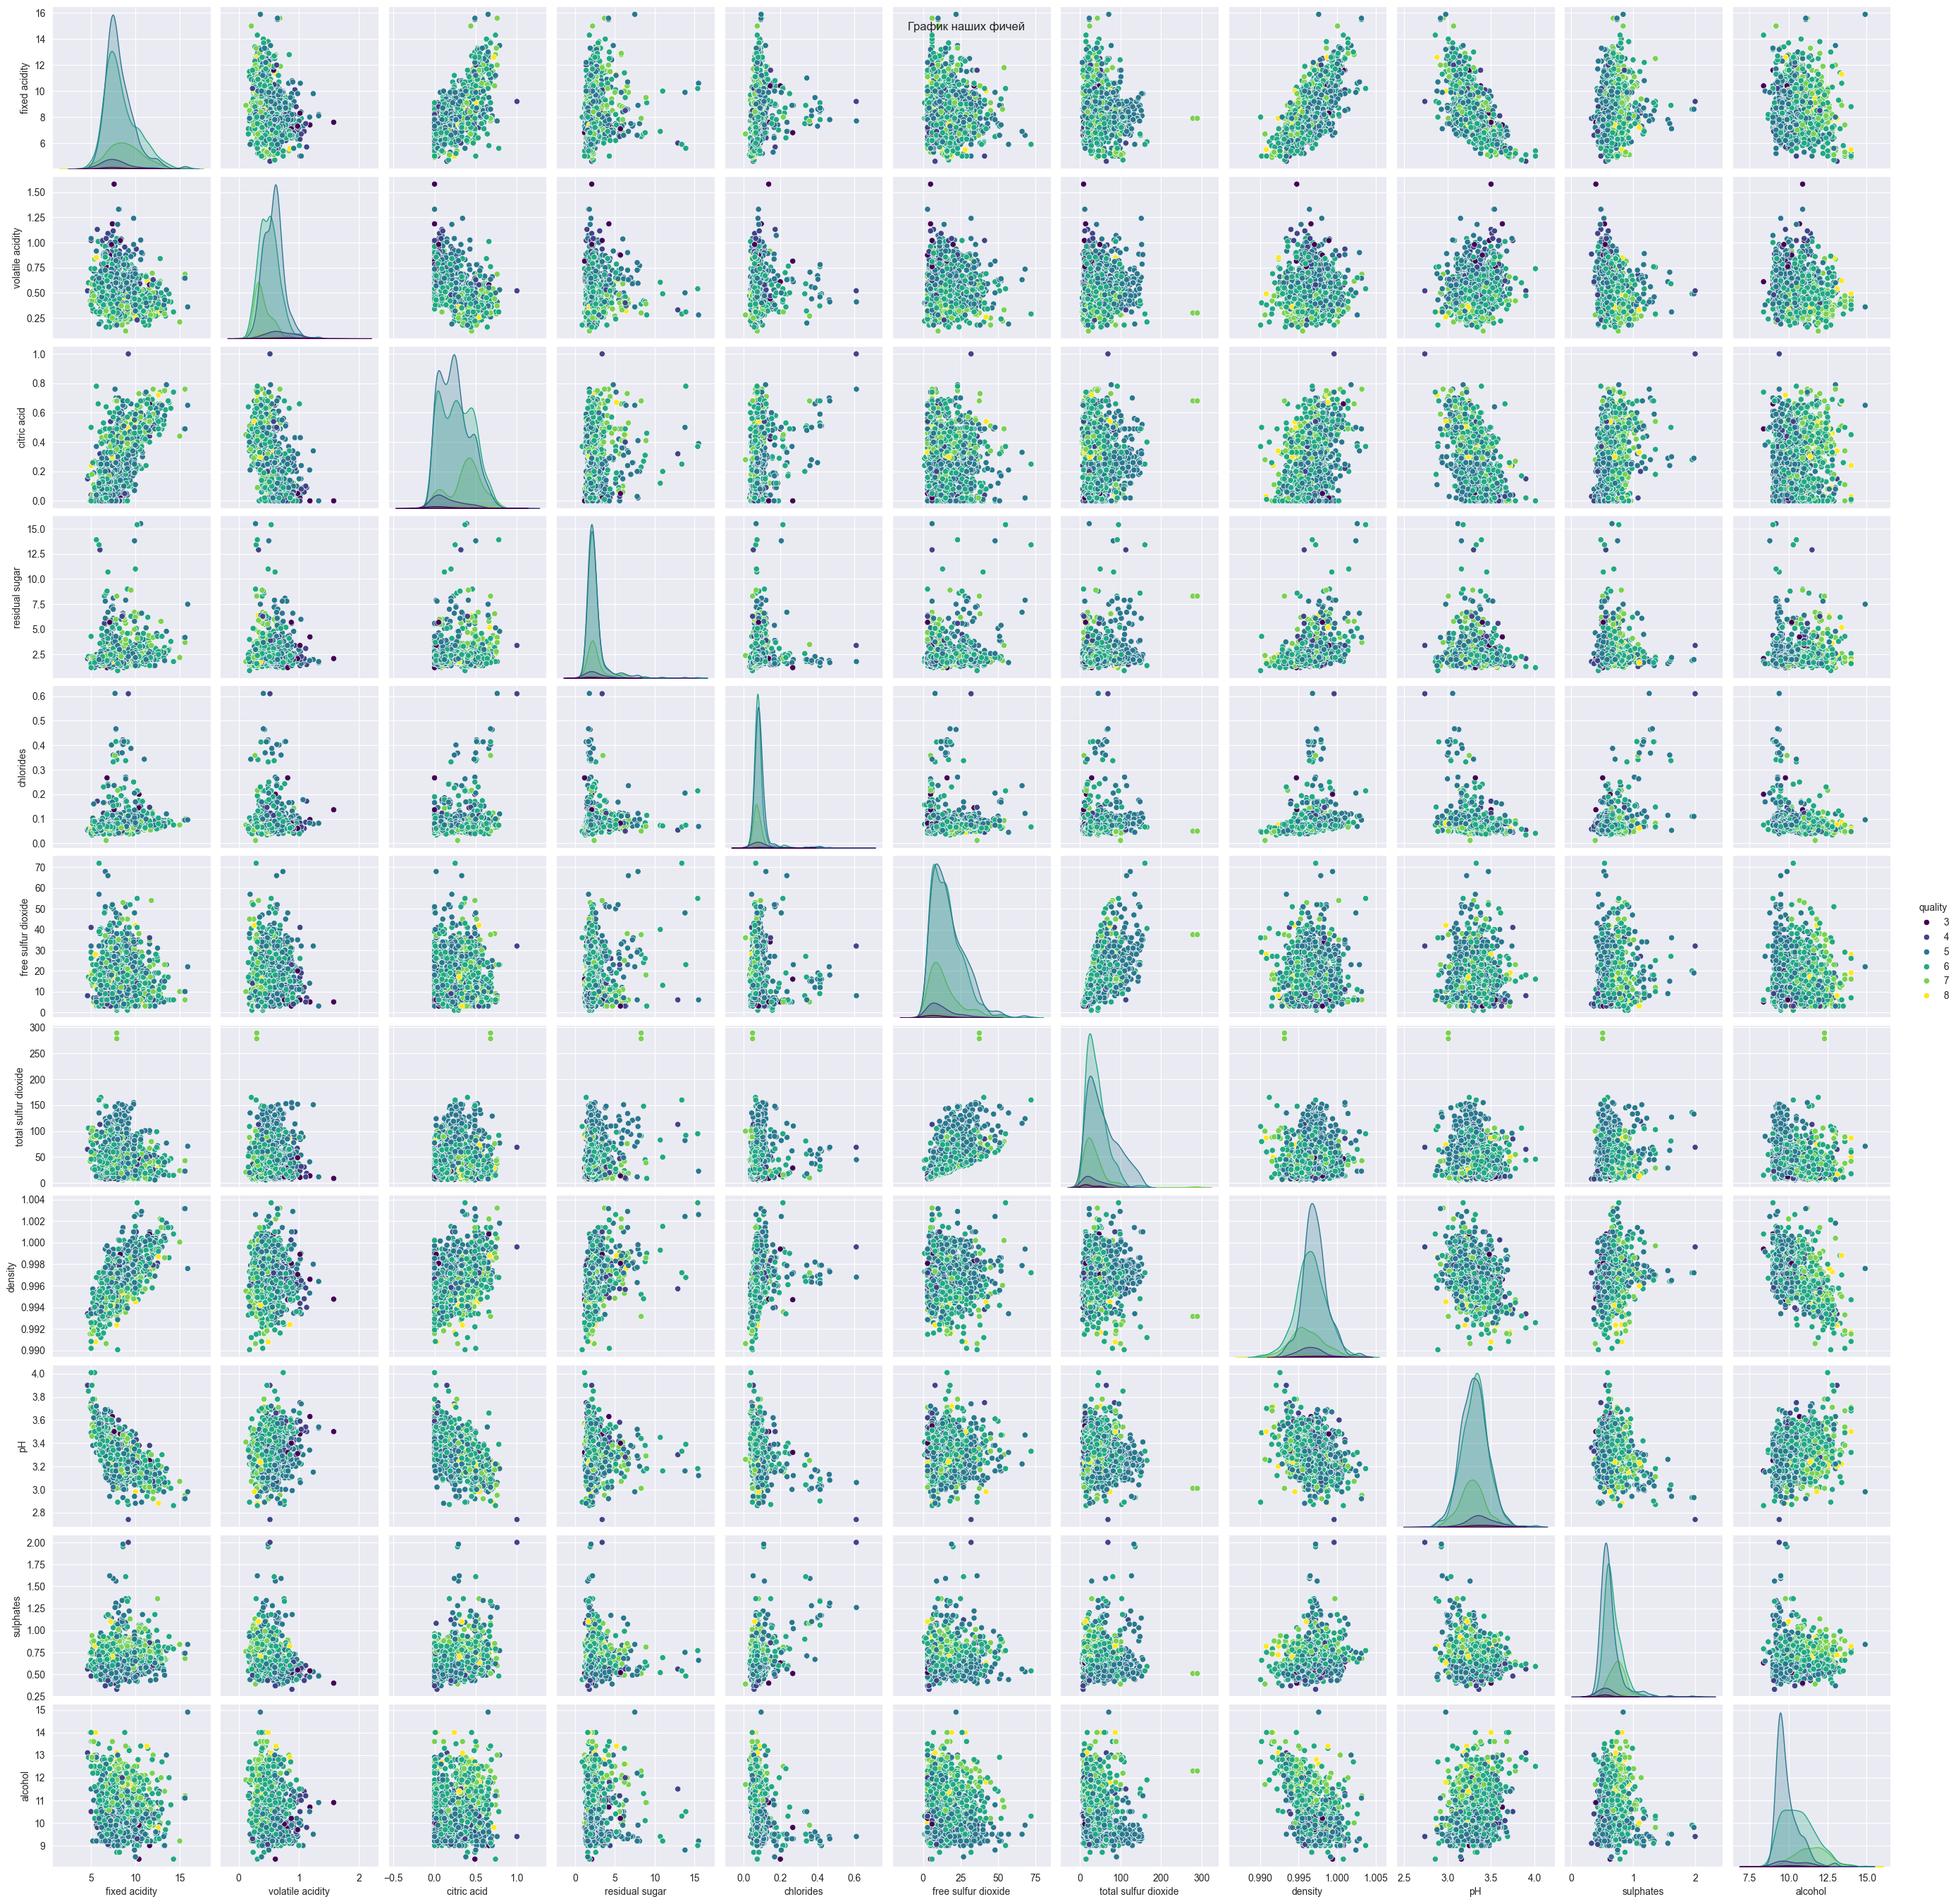

In [6]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide',
            'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
sns.pairplot(df[features], hue='quality', markers='o', palette='viridis')
plt.suptitle("График наших фичей")
plt.show()

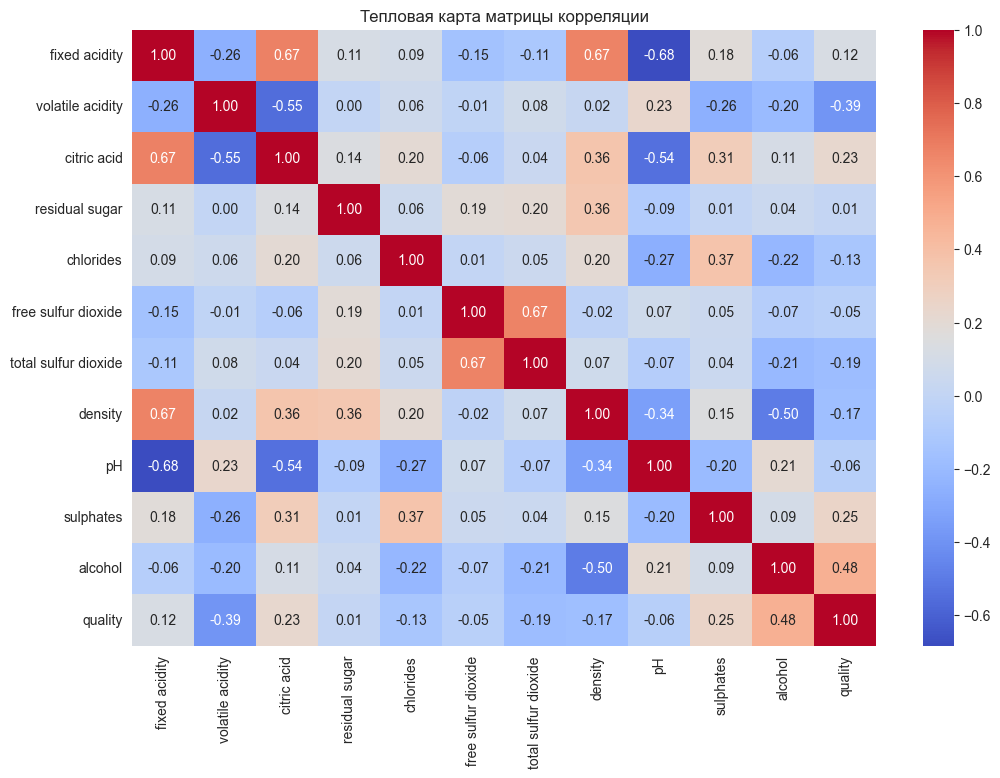

In [7]:
# Тепловая карта нашей матрицы корреляции
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Тепловая карта матрицы корреляции")
plt.show()

In [8]:
X = df.drop('quality', axis=1)
y = df['quality']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Нормализуем наши фичи
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# Сам ЛДА
lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

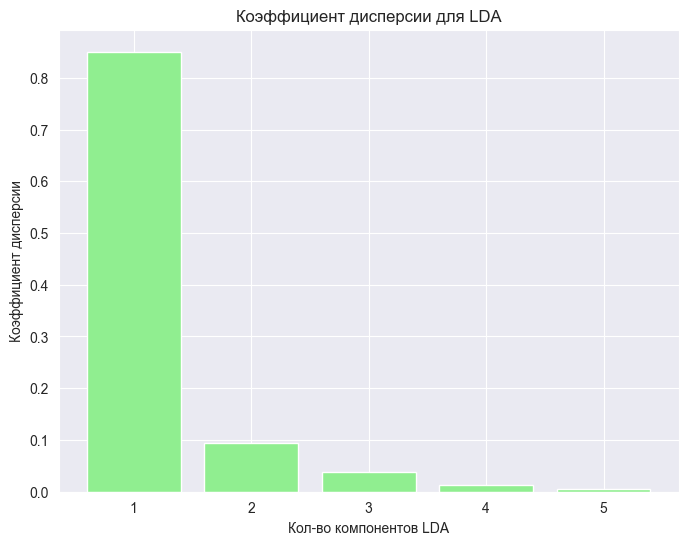

In [12]:
plt.figure(figsize=(8, 6))
plt.bar(range(1, lda.explained_variance_ratio_.shape[0] + 1), lda.explained_variance_ratio_, color="lightgreen")
plt.xlabel('Кол-во компонентов LDA')
plt.ylabel('Коэффициент дисперсии')
plt.title('Коэффициент дисперсии для LDA')
plt.show()

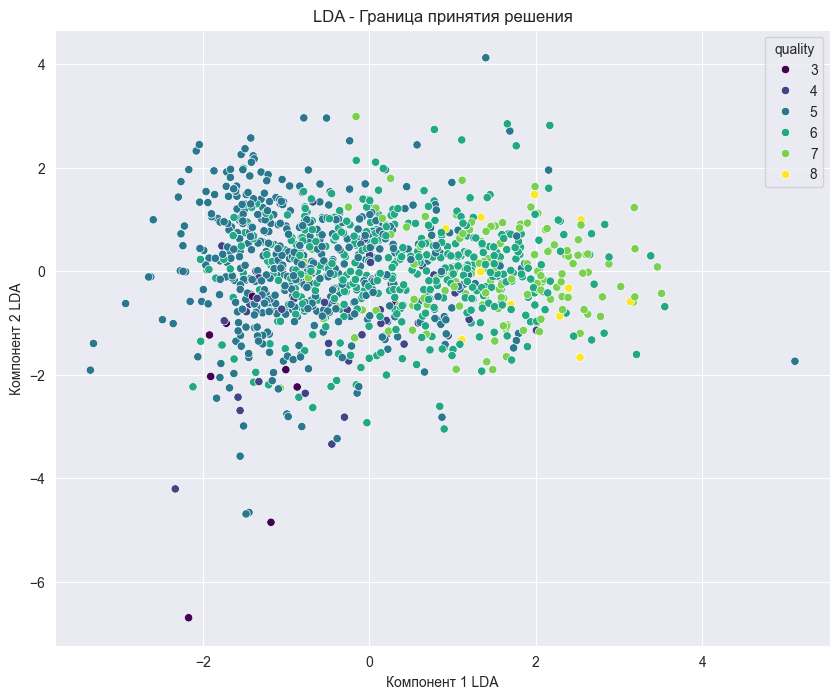

In [13]:
# Построим границу принятия решения
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_train_lda[:, 0], y=X_train_lda[:, 1], hue=y_train, palette='viridis')
plt.title('LDA - Граница принятия решения')
plt.xlabel('Компонент 1 LDA')
plt.ylabel('Компонент 2 LDA')
plt.show()

In [16]:
# Используем случайный лес
rf_classifier = RandomForestClassifier(random_state=42)
# Воспользуемся подбором гиперпараметров с пмощью гридсерча
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [18]:
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, scoring='accuracy', verbose=10)
grid_search.fit(X_train_lda, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV 1/3; 1/108] START max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 1/3; 1/108] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.625 total time=   0.1s
[CV 2/3; 1/108] START max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 2/3; 1/108] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.636 total time=   0.1s
[CV 3/3; 1/108] START max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 3/3; 1/108] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.657 total time=   0.1s
[CV 1/3; 2/108] START max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 1/3; 2/108] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.635 total time=   0.2s
[CV 2/3; 2/108] START max_depth=None, min_samples_l

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy', verbose=10)

In [19]:
# Лучшие параметры
best_params = grid_search.best_params_

# Используем модель для прогноза
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(lda.transform(X_test_scaled))

In [20]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.64


In [21]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       1.00      0.10      0.18        10
           5       0.70      0.77      0.74       130
           6       0.63      0.63      0.63       132
           7       0.49      0.52      0.51        42
           8       0.00      0.00      0.00         5

    accuracy                           0.64       320
   macro avg       0.47      0.34      0.34       320
weighted avg       0.64      0.64      0.63       320


C:\Users\Admin\PycharmProjects\100DaysOfDataScience\venv\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\PycharmProjects\100DaysOfDataScience\venv\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\PycharmProjects\100DaysOfDataScience\venv\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [22]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[  0   0   1   0   0   0]
 [  0   1   7   2   0   0]
 [  0   0 100  27   3   0]
 [  0   0  32  83  17   0]
 [  0   0   2  18  22   0]
 [  0   0   0   2   3   0]]


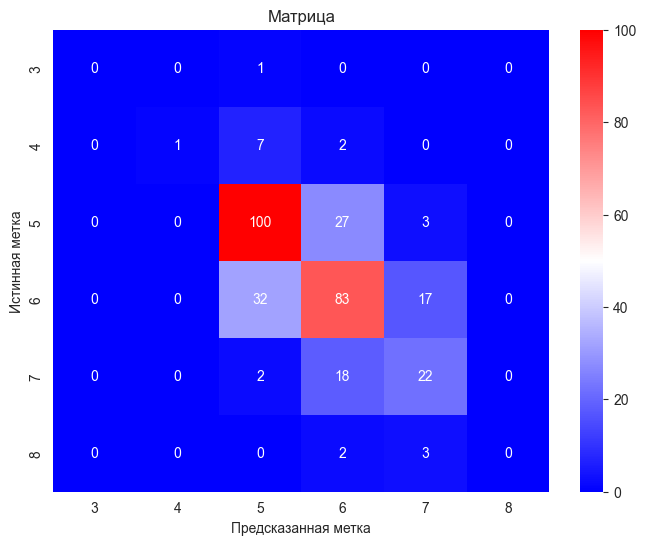

In [23]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='bwr', xticklabels=sorted(y_test.unique()),
            yticklabels=sorted(y_test.unique()))
plt.title('Матрица')
plt.xlabel('Предсказанная метка')
plt.ylabel('Истинная метка')
plt.show()